## Wrangle WeRateDogs Twitter data

#### In this project I will wrangling data which consists of gathering, assessing  and cleaning, then analyses and visualizations Twitter data using three data set , Enhanced Twitter Archive ,Image Predictions File and Tweet JSON Data using API.

In [1]:
#Import the libraries that we will need in this project
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import json
import requests
import tweepy


## Gathering Data

### twitter archive

In [2]:

# Read twitter archive in csv file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


### image predictions

In [3]:
# Use requests library to download image prediction tsv file from a website
image_prediction_url=" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(image_prediction_url)

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)


In [4]:
# Read in tsv file as a Pandas DataFrame    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

### json data

<li> Query the Twitter API using Tweepy library to get JSON data for each of the tweets in the WeRateDogs Twitter archive.

In [5]:
#Personal API keys, secrets, and tokens
consumer_key = 'Z7EQF9sFZ6USZuoFVqSe36Fqj'
consumer_secret = '6l3GjgpE1MEL43o3BNl5qUxwZzIRIaZPqIOfcErYpXfDzaWyz5'
access_token = '2695424372-T5Y56hW9sIbjD7rZ2NLHWT2xhUiEDRSdg613BJD'
access_secret = 'iVA14fQLlH90AWXJGoBmMD19lkXLURtQYooWufAAynKEd'

In [6]:
 #creating an OAuthHandler then access to the Twitter API then create an API object that we are going to use it to fetch the tweets
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth , wait_on_rate_limit=True)

In [7]:
list_t=[]
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
          f.write('\n')
        except:
            list_t.append(tweet_id)
          

In [8]:
# open JSON as file and append required fields to array

tweets_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        try:
            tweets_dict['tweet_id'] = tweets_json['extended_entities']['media'][0]['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)

In [9]:
#converting JSON data to DataFrame
tweets_df = pd.DataFrame(tweets_list)

## Assessing Data
Three datasets : twitter_archive,image_predictions,tweets_df.

I assess the gathered data visually and programmatically 
Detect and document the quality and tidiness issues. 

In [10]:
# use head function to show first 10 rows in twitter_archive
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
# use info to show summary twitter_archive dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

issues :
<li>There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
<li>There are 78 replies (in_reply_to_status_id, in_reply_to_user_id)
<li>There are 2297 tweets with expanded_urls (links to images) indicating 59 tweets with missing data
<li>The timestamp data type is string (object)
<li>There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
<li>The columns related to retweets are not applicable for original tweets
<li>The columns related to replies are not applicable for original tweets

In [12]:
# null_values in twitter_archive
null_values = twitter_archive.columns[twitter_archive.isnull().any()]
twitter_archive[null_values].isnull().sum()

in_reply_to_status_id         2278
in_reply_to_user_id           2278
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
dtype: int64

In [13]:
# check duplicated tweet_id
sum(twitter_archive.duplicated('tweet_id'))

0

## dog stage

In [14]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

## dog names

use value_counts() to  detect the issues in the name column 

In [18]:
twitter_archive.name.value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
Bailey       7
Daisy        7
Buddy        7
Toby         7
an           7
Milo         6
Rusty        6
Name: name, dtype: int64

issue :  dog names are all capitalized, so the names in lowercase are probably not names, below array for these names

there are 745 tweets with the dog name as "None". 

In [19]:
lowers = twitter_archive.name.loc[twitter_archive.name.str.islower()].unique()
lowers , len(lowers)

(array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
        'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
        'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
        'officially', 'life', 'light', 'space'], dtype=object), 25)

There are 25 name not a valid name (quilty issue)

## dog rating

For rating_numerator and rating_denominator I will find the max and min values and use value_counts() to detect the issues

In [20]:
print('Max numerator is', twitter_archive.rating_numerator.max(),'Min numerator is',twitter_archive.rating_numerator.min()
     )

Max numerator is 1776 Min numerator is 0


In [21]:
print('Max denominator is',twitter_archive.rating_denominator.max(),'Min denominator is',twitter_archive.rating_denominator.min()
     )

Max denominator is 170 Min denominator is 0


 issues :
 The max values are huge: 1776, 170.
 The minimum is 0 for both.

In [22]:
twitter_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [23]:
# there is a few rating numerator >= 15 so will choose it as a boundary
sum(twitter_archive.rating_numerator >= 15)

28

There are 28 tweets with rating_numerator >= 15. The max value is 1776, which does not make sense.

In [24]:
twitter_archive.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

we just interest for tweets with rating denominator equal 10 the others not valid (quality issue)

In [25]:
# the tweets with rating_denominator != 10 
sum(twitter_archive.rating_denominator != 10)

23

There are 23 tweets with rating_denominator not 10. we only look at tweets with rating_denominator of 10.

 there are rating multiples of 10. its rating for more than 1 dog in photo.Ignoring the retweets and replies we have the following list.

In [26]:
# display tweets that do NOT have denominator of 10,
# and are NOT replies and are NOT retweets
rating_filtr = (twitter_archive.rating_denominator != 10) & \
            twitter_archive.in_reply_to_status_id.isna() & \
            twitter_archive.retweeted_status_id.isna()

filtr_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
twitter_archive[rating_filtr][filtr_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24,7
902,Why does this never happen at my front door......,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She ...",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #Final...,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45,50


In [27]:
print('The number of tweets with denominators that are not 10 and not replies or retweets ',sum(rating_filtr))

The number of tweets with denominators that are not 10 and not replies or retweets  17


In [28]:
#choos large numerator e.g 1120 to see the it's url
twitter_archive.iloc[1120].expanded_urls

'https://twitter.com/dog_rates/status/731156023742988288/photo/1'

ther are many dogs in the photo

In [29]:
# display tweets with numerator >= 15 that and denominator = 10,
# and are NOT replies and are NOT retweets
rating_filtr = (twitter_archive.rating_denominator == 10) & \
            (twitter_archive.rating_numerator >= 15) & \
            twitter_archive.in_reply_to_status_id.isna() & \
            twitter_archive.retweeted_status_id.isna()

filtr_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
twitter_archive[rating_filtr][filtr_cols]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly...",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,778027034220126208,27,10
979,This is Atticus. He's quite simply America af....,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of ...,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood...,670842764863651840,420,10


there are 5 tweets it is not replies or retweets with denominator = 10 and numerator >= 15.
will not fixed it will dropped


In [30]:
#choos large numerator e.g 979 to see the it's url
twitter_archive.iloc[979].expanded_urls

'https://twitter.com/dog_rates/status/749981277374128128/photo/1'

## source

In [31]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

issue (Quality):
<li>There are 4 types of sources difficult to read, and they can be simplified 

### image predictions file

In [32]:
# use head function to show first 5 rows in image_predictions
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<li> There are 2075 image predictions and in the 2356 in the archive , there are 281 missing data
<li> p1, p2 and p3 contain the dog breed predictions
<li> p1_conf, p2_conf and p3_conf contain values for confidence 
<li> p1_dog, p2_dog and p3_dog contain Boolean values indicating whether the prediction is true or false

In [34]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [36]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [37]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### json data

In [38]:
tweets_df.head(20)

,favorite_count,retweet_count,tweet_id
0,36893,7858,892420639486877696
1,31749,5830,892177413194625024
2,23920,3853,891815175371796480
3,40207,8034,891689552724799489
4,38404,8682,891327551943041024
5,19325,2894,891087942176911360
6,11255,1905,890971906207338496
7,62215,17558,890729118844600320
8,26588,3986,890609177319665665
9,30427,6834,890240245463175168


In [39]:
# use info to show summary tweets_df (json data) dataframe
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10057 entries, 0 to 10056
Data columns (total 3 columns):
favorite_count    10057 non-null int64
retweet_count     10057 non-null int64
tweet_id          10057 non-null object
dtypes: int64(2), object(1)
memory usage: 235.8+ KB


<li> tweet_id is object should change to int for we can merge the data sets

In [40]:
tweets_df.isnull().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

<li>No missin values 

In [41]:
tweets_df.describe()

,favorite_count,retweet_count
count,10057.000000,10057.000000
mean,8528.205926,2941.435915
std,12632.931018,4756.553830
min,0.000000,1.000000
25%,1393.000000,582.000000
50%,3599.000000,1434.000000
75%,11211.000000,3486.000000
max,159393.000000,79519.000000


## Cleaning Data

#### twitter_archive cleaning 

In [42]:
# make a copy for clean data
twitter_archive_clean = twitter_archive.copy()

#### timestamp data type :

##### Define
Convert timestamp from object to datetime data type.

In [43]:
# code
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['timestamp'] = twitter_archive_clean.timestamp.dt.floor('s')

In [44]:
#test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### replies and retweets :

##### Define
<li>All columns related to retweets or replies will be empty (interested in originals tweets).

In [45]:
#test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [46]:
#Drop all rows containing retweets, where these columns will be non-null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.
sum(twitter_archive_clean.retweeted_status_id.notnull())

181

In [47]:
#code
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]

In [48]:
#test
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [49]:
# Drop all rows that are replies, those that have non-null values in these columns: in_reply_to_status_id and in_reply_to_user_id.
sum(twitter_archive_clean.in_reply_to_status_id.notnull())

78

In [50]:
#code
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isna()]

In [51]:
#test
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


we're not interested in replies and retweets, we can drop all columns related to retweets: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
and Drop all columns related to replies: in_reply_to_status_id and in_reply_to_user_id 

In [52]:
# drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
#code
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

In [53]:
# drop in_reply_to_status_id and in_reply_to_user_id
#code
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)


In [54]:
# test
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### source :

##### Define
The source column difficult to read and can be simplified by extracting and replacing with it's display string.

In [55]:
# code
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

In [56]:
#test
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### rating_denominator and  rating_numerator :

##### Define
<li>tweets with rating_denominator not equal to 10 not valid 
<li>Drop the tweets with rating_denominator not equal to 10


In [57]:
#code
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

In [58]:
# test
twitter_archive_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

##### Define 
 all rating_denominators are the same (10) this column is no longer needed

In [59]:
#Drop the rating_denominator column not useful.
#code
twitter_archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)

##### Define
<li>tweets with rating_numerator >= 15 don't make sense
<li>Drop tweets that have rating_numerator >= 15

In [60]:
#code
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_numerator < 15]

In [61]:
#test
# display ALL numerators
twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

14     38
13    287
12    486
11    413
10    436
9     152
8      98
7      51
6      32
5      34
4      15
3      19
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

In [62]:
# Define: Rename the rating_numerator column to be rating
#code
twitter_archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

In [63]:
# test
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### dog stages: doggo, floofer, pupper, puppo

##### Define
Tidiness issu
<li>There are 4 columns for dog stages: doggo, floofer, pupper, puppo.
<li>I will combine in one new column (dog_stage) and Drop the 4 original dog stage columns 
 note: I will Create a temporary column 'none' to store the None values.
Create a new column stage to store the categories: doggo, floofer, pupper, puppo, as well as None, and select the stage from the column that contains a value.
Drop the 4 original dog stage columns, and the temporary none column.
    

In [64]:
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2075,2075,2075,2075
unique,2,2,2,2
top,None,None,None,None
freq,1992,2065,1846,2051


 I'm going to order the dog stages by count, in increasing order: floofer, puppo, doggo and pupper.

In [65]:
# make dummy varibles: if find value in the column set to 1 and if it is None set to zero 
#code
dummy = lambda x: 0 if x == 'None' else 1

twitter_archive_clean.doggo = twitter_archive_clean.doggo.apply(dummy)
twitter_archive_clean.floofer = twitter_archive_clean.floofer.apply(dummy)
twitter_archive_clean.pupper = twitter_archive_clean.pupper.apply(dummy)
twitter_archive_clean.puppo = twitter_archive_clean.puppo.apply(dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
twitter_archive_clean['none'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + \
                        twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']


In [66]:
# test
twitter_archive_clean['none'].value_counts()

0    1740
1     324
2      11
Name: none, dtype: int64

there are 1740 None and 324 value in none column , 2 indacites there are 11 tweets have more than dog stage

In [67]:
# if there are NO stages specified then set 'None' to 1
none_values = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
twitter_archive_clean['none'] = twitter_archive_clean['none'].apply(none_values)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
dog_stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (twitter_archive_clean[dog_stage[0]] == 1),
    (twitter_archive_clean[dog_stage[1]] == 1),
    (twitter_archive_clean[dog_stage[2]] == 1),
    (twitter_archive_clean[dog_stage[3]] == 1),
    (twitter_archive_clean[dog_stage[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
twitter_archive_clean['dog_stage'] = np.select(conditions, dog_stage, default = dog_stage[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
twitter_archive_clean.drop(dog_stage, axis = 1, inplace = True)

# set the 'stage' column data type to category
twitter_archive_clean['dog_stage'] = twitter_archive_clean.dog_stage.astype('category')

In [68]:
# test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2075 non-null int64
timestamp        2075 non-null datetime64[ns]
source           2075 non-null object
text             2075 non-null object
expanded_urls    2072 non-null object
rating           2075 non-null int64
name             2075 non-null object
dog_stage        2075 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 131.9+ KB


In [69]:
twitter_archive_clean.dog_stage.value_counts()

none       1740
pupper      220
doggo        81
puppo        24
floofer      10
Name: dog_stage, dtype: int64

 #### image_predictions cleaning

In [70]:
# make a copy for cleaning
image_clean = image_predictions.copy()

In [71]:
# drop the false prediction
#code
image_clean.drop(image_clean[image_clean.p1_dog == False].index, inplace=True)

In [72]:
#test
image_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

In [73]:
# rename p1 to dog_breed_prediction and p1_conf to prediction_confidence
# code
col_names = {'p1':'dog_breed_prediction', 'p1_conf':'prediction_confidence'}

image_clean.rename(columns= col_names, inplace=True)

In [74]:
# drop the rest columns
col_drop = ['jpg_url', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf']

image_clean.drop(col_drop, inplace=True, axis=1)

In [75]:
# Test
list(image_clean.columns)

['tweet_id', 'img_num', 'dog_breed_prediction', 'prediction_confidence']

#### json data claening

In [76]:
tweets_df_clean = tweets_df.copy()

In [77]:
# Define: Finding non-numeric values for "tweet_id"
non_num = []

for i in range(0, len(tweets_df_clean.tweet_id)):
    if type(tweets_df_clean.tweet_id[i]) != int:
        non_num.append(i)
      

In [78]:
 print (len(non_num))

1232


In [79]:
tweets_df_clean.shape

(10057, 3)

In [80]:
for i in non_num:
    tweets_df_clean.drop(tweets_df_clean[tweets_df_clean.index == i].index, inplace=True)

In [81]:
tweets_df_clean.shape

(8825, 3)

In [82]:
# Reset index
tweets_df_clean = tweets_df_clean.reset_index()
del tweets_df_clean['index']

In [83]:
# Define: change the 'tweet_id' data type to int
#code
tweets_df_clean['tweet_id']=tweets_df_clean['tweet_id'].astype(int)
tweets_df_clean['tweet_id']=tweets_df_clean['tweet_id'].astype(np.int64)

In [84]:
#test
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8825 entries, 0 to 8824
Data columns (total 3 columns):
favorite_count    8825 non-null int64
retweet_count     8825 non-null int64
tweet_id          8825 non-null int64
dtypes: int64(3)
memory usage: 206.9 KB


## Store Data

In [85]:
# Merge the tweets_df_clean to the twitter_archive_clean, joining on tweet_id.
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_df_clean, 
                         on = 'tweet_id', how = 'left')

In [86]:
# then Merge image_clean to the twitter_archive_clean, joining on tweet_id
twitter_archive_clean = pd.merge(twitter_archive_clean, image_clean, 
                         on = 'tweet_id', how = 'left')

In [87]:
# save to csv file
twitter_archive_clean.to_csv('clean_twitter_archive_data.csv')


## Analysis

In [99]:
we_rate_dogs.shape

(2075, 13)

In [88]:
# make a copy of the archive for analysis
we_rate_dogs = twitter_archive_clean.copy()
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id                 2075 non-null int64
timestamp                2075 non-null datetime64[ns]
source                   2075 non-null object
text                     2075 non-null object
expanded_urls            2072 non-null object
rating                   2075 non-null int64
name                     2075 non-null object
dog_stage                2075 non-null category
favorite_count           0 non-null float64
retweet_count            0 non-null float64
img_num                  1446 non-null float64
dog_breed_prediction     1446 non-null object
prediction_confidence    1446 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 213.0+ KB


#### Question:
#### what is the Percentage of tweets with rating of 10 and up ?

In [90]:
# Percentage of tweets with rating of 10 and up
high_rating = sum(we_rate_dogs.rating >= 10)
high_perc = round(high_rating * 100 / we_rate_dogs.shape[0])
print("Number of tweets with rating up to 10:  {}".format(high_rating))
print("Percentage of tweets:                {}%".format(round(high_perc, 3)))

Number of tweets with rating up to 10:  1660
Percentage of tweets:                80%


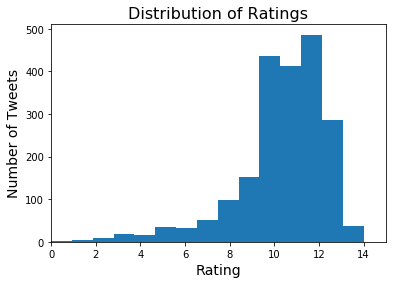

In [89]:
we_rate_dogs['rating'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

The distribution of ratings is very skewed to the left.
the IQR is from 10 to 12
From statistics  we see that 80% of all ratings are up 10 

#### Question: 
#### What is the most common stage?

In [91]:
we_rate_dogs.dog_stage.value_counts()

none       1740
pupper      220
doggo        81
puppo        24
floofer      10
Name: dog_stage, dtype: int64

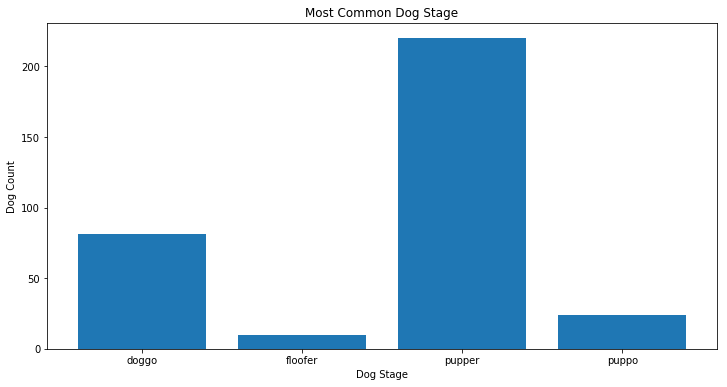

In [92]:
#chart common stage ( ignore none)
dog_type = ['pupper', 'doggo', 'puppo', 'floofer']
dog_counts = [220, 81, 24, 10]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Dog Stage')
plt.title("Most Common Dog Stage")
plt.show()

The chart show the most popular dog type is a "pupper" it is up than 200, then doggo , the last common stage is floofer 

#### Question:
#### What are the 10 most dog breeds tweeted about? (Excluding the category 'none'.)

In [93]:
none_count = sum(we_rate_dogs.dog_breed_prediction == 'none')

print("Number of tweets with 'none' predicted breed:",none_count)



Number of tweets with 'none' predicted breed: 0


In [94]:
dist_breeds = len(we_rate_dogs.dog_breed_prediction.unique())

print("Number of distinct breeds:" , dist_breeds) 

Number of distinct breeds: 111


In [95]:
top10_breeds_count = \
we_rate_dogs[we_rate_dogs.dog_breed_prediction != 'none'].dog_breed_prediction.value_counts().head(10)
print("Breed and number of tweets:")
print(top10_breeds_count)

Breed and number of tweets:
golden_retriever      134
Labrador_retriever     91
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             37
toy_poodle             37
malamute               29
Name: dog_breed_prediction, dtype: int64


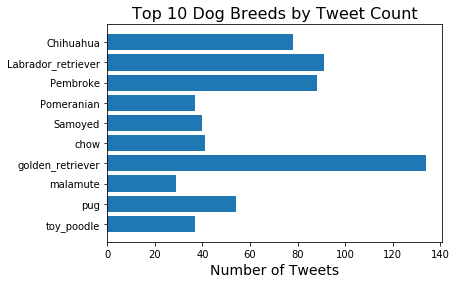

In [96]:
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

The most dog breed tweeted about is golden_retriever 
The bar chart shows that the most ten common dog breed that is tweeted about, the Golden Retriever was the most with almost 140 tweets, Labrador Retrievers, Pembrokes and Chihuahuas are fairly close together in 2nd, 3rd, and 4th place.